<a href="https://colab.research.google.com/github/NeilCollinsMS/CTU-13-Classification/blob/main/CTU_13_Classification_(Aggregate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CTU-13 Classification Project**

Aggregate Notebook (Each scenario combined and analyzed using train/test splits for validation)

There is an alternate notebook that was generated with per-scenario models (that you should not use because they are unrefined and flawed).

I am making use of Google Colab Pro ($10/mo) so that memory does not become an issue.

In [34]:
# Import Libraries - Same libraries utilized for per-scenario base models with a few additions to mount to Google Drive
import pandas as pd
import numpy as np
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab import files

Time to aggregate all of the scenarios into one massive dataframe 

In [3]:
# Mounting google drive to this colab file. The file is too large to hold on my local host (3 GB), so storing it in drive is the easiest way to easily access it for future use.
drive.mount('/content/drive')
os.chdir("drive/My Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Checking that we're in the right place
os.getcwd()

'/content/drive/My Drive'

In [ ]:
# Only run these once to get the dataframes. The next steps will be to concat them into a master dataframe and then export that dataframe to a CSV to save session memory. 

scenario_1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow')
scenario_2 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow')
scenario_3 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow')
scenario_4 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow')
scenario_5 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow')
scenario_6 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow')
scenario_7 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow')
scenario_8 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow')
scenario_9 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow')
scenario_10 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow')
scenario_11 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow')
scenario_12 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow')
scenario_13 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow')

In [ ]:
scenario_df = pd.concat([scenario_1, scenario_2, scenario_3, scenario_4, scenario_5, scenario_6, scenario_7, scenario_8, scenario_9, scenario_10, scenario_11, scenario_12, scenario_13], ignore_index = True)

In [ ]:
scenario_df.tail()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
19976695,2011/08/16 09:36:00.710103,0.000000,udp,147.32.84.229,13363,->,125.14.162.10,27460,INT,0.0,NaN,1,476,476,flow=Background-UDP-Attempt
19976696,2011/08/16 09:36:00.777160,0.000427,udp,213.146.167.54,20856,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
19976697,2011/08/16 09:36:00.784094,0.000000,udp,147.32.84.229,13363,->,122.121.0.92,12923,INT,0.0,NaN,1,476,476,flow=Background-UDP-Attempt
19976698,2011/08/16 09:36:00.784160,0.000000,udp,147.32.84.229,13363,->,110.233.175.133,37690,INT,0.0,NaN,1,476,476,flow=Background-UDP-Attempt
19976699,2011/08/16 09:36:00.806547,0.000008,tcp,147.32.87.51,12489,->,147.32.86.96,49773,SA_,0.0,NaN,2,140,140,flow=Background-TCP-Established


In [ ]:
# Making a label column identifying the malicious IPs 
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.191', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.192', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.193', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.204', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.205', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.206', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.207', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.208', 'Malicious'] = 1
scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.209', 'Malicious'] = 1
scenario_df.loc[scenario_df['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_df.loc[scenario_df['SrcAddr'] == '147.32.84.165'].head())
display(scenario_df.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
675537,2011/08/10 11:04:24.863449,0.000278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V42-UDP-DNS,1.0
675872,2011/08/10 11:04:27.118993,0.020525,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V42-UDP-DNS,1.0
675877,2011/08/10 11:04:27.140727,0.045125,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V42-TCP-HTTP-Google-Net-Estab...,1.0
689920,2011/08/10 11:06:23.268442,0.336250,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,215,71,flow=From-Botnet-V42-UDP-DNS,1.0
689955,2011/08/10 11:06:23.606888,3514.083496,tcp,147.32.84.165,1039,->,60.190.222.139,65520,SPA_SPA,0.0,0.0,120,7767,2690,flow=From-Botnet-V42-TCP-Established,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established,0.0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established,0.0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background,0.0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background,0.0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established,0.0


In [ ]:
# Too many to one-hot encode, not worth it for now
scenario_df.State.unique()

array(['CON', 'FA_A', 'FA_FA', 'PA_PA', 'FPA_FRPA', 'FPA_RPA',
       'FSPA_FSPA', 'PA_A', 'FA_RA', 'PA_FRA', 'FRPA_FPA', 'FPA_FA', 'A_',
       'INT', 'FA_', 'S_SA', 'RPA_RPA', 'FPA_FPA', 'PA_RPA', 'FSPA_FSRPA',
       'S_', 'SA_R', 'SRPA_SPA', 'SRA_SA', 'FPA_', 'RPA_PA', 'URP',
       'SRPA_FSRPA', 'FRPA_PA', 'URN', 'PA_', 'FA_FPA', 'SPA_FSPA',
       'PA_FRPA', 'PA_PAC', 'PA_FPA', 'FSRPA_FSPA', 'FRPA_RA', 'TXD',
       'RA_FA', 'FRA_', 'ECO', 'FRA_FPA', 'SRPA_FSPA', 'URH', 'SA_',
       'SRPA_SRA', 'FSA_FSA', 'RPA_FPA', 'FSRPA_SPA', 'S_RA', 'PA_R',
       'RA_A', 'RED', 'RA_', 'SPA_SRPA', 'FA_R', 'RA_FPA', 'A_PA', 'ECR',
       'FSPA_FSRA', 'SPA_SPA', 'FSRPA_FSRPA', 'SRA_FSA', 'FPA_PA',
       'SR_SA', 'FRPA_RPA', 'FPA_RA', 'FPA_FRA', 'FSPA_FSA', 'FRA_FA',
       'URFIL', '_FSPA', 'R_', 'FA_FRPA', 'SPA_FSRPA', 'FA_FRA',
       'RPA_FRPA', 'RPA_R', 'A_A', 'A_RA', 'SRPA_SA', 'SRA_RA',
       'FSPA_SPA', 'RPAC_PA', 'SPA_SRA', 'FSPAC_FSPA', 'PA_RA', 'FRPA_FA',
       'SR_A', 'A_R', 'SRP

In [ ]:
# This is a very bulky dataframe, to save space I am going to drop any columns that I do not plan to utilize in the models.

scenario_df.drop(['StartTime', 'SrcAddr', 'Sport', 'Dir', 'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 'Label'], axis = 1, inplace = True)

In [ ]:
scenario_df

,Dur,Proto,TotPkts,TotBytes,SrcBytes,Malicious
0,3550.182373,udp,12,875,413,0.0
1,0.000883,udp,2,135,75,0.0
2,0.000326,tcp,2,120,60,0.0
3,0.056966,tcp,3,180,120,0.0
4,3427.768066,udp,42,2856,1596,0.0
...,...,...,...,...,...,...
19976695,0.000000,udp,1,476,476,0.0
19976696,0.000427,udp,2,135,75,0.0
19976697,0.000000,udp,1,476,476,0.0
19976698,0.000000,udp,1,476,476,0.0


In [ ]:
# Saving the scenarios dataframe to my drive for easy access in the future. I will likely do this for the training/testing data splits later on as well so I don't have to pull this goliath dataset every time I want to train. 
with open('/content/drive/My Drive/scenarios.csv', 'w') as f:
  scenario_df.to_csv(f, header = True, index = False)

In [6]:
scenarios = pd.read_csv('scenarios.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [ ]:
scenarios

,Dur,Proto,TotPkts,TotBytes,SrcBytes,Malicious
0,3550.1823729999996,udp,12,875,413,0.0
1,0.000883,udp,2,135,75,0.0
2,0.00032599999999999996,tcp,2,120,60,0.0
3,0.056965999999999996,tcp,3,180,120,0.0
4,3427.7680659999996,udp,42,2856,1596,0.0
...,...,...,...,...,...,...
19976695,0.0,udp,1,476,476,0.0
19976696,0.00042699999999999997,udp,2,135,75,0.0
19976697,0.0,udp,1,476,476,0.0
19976698,0.0,udp,1,476,476,0.0


In [ ]:
# Time for one hot encoding of Proto. Usually I'd do this before making a permanent file, but just running the setup files eats most of a colab session worth of memory, so this will have to do

Proto_dummy = pd.get_dummies(scenarios.Proto)
scenarios = pd.concat([scenarios, Proto_dummy], axis = 1)
scenarios

,Dur,Proto,TotPkts,TotBytes,SrcBytes,Malicious,arp,esp,gre,icmp,igmp,ipnip,ipv6,ipv6-icmp,ipx/spx,llc,pim,rarp,rsvp,rtcp,rtp,tcp,udp,udt,unas
0,3550.1823729999996,udp,12,875,413,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.000883,udp,2,135,75,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.00032599999999999996,tcp,2,120,60,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.056965999999999996,tcp,3,180,120,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3427.7680659999996,udp,42,2856,1596,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976695,0.0,udp,1,476,476,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19976696,0.00042699999999999997,udp,2,135,75,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19976697,0.0,udp,1,476,476,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19976698,0.0,udp,1,476,476,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
scenarios.drop(['Proto'], axis = 1, inplace = True)

In [ ]:
# Time to save the updated version
with open('/content/drive/My Drive/scenarios_1h.csv', 'w') as f:
  scenarios.to_csv(f, header = True, index = False)

In [5]:
# Yay, we can finally build models....hopefully
scenarios_1h = pd.read_csv('scenarios_1h.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [5]:
scenarios_1h.head()

,Dur,TotPkts,TotBytes,SrcBytes,Malicious,arp,esp,gre,icmp,igmp,ipnip,ipv6,ipv6-icmp,ipx/spx,llc,pim,rarp,rsvp,rtcp,rtp,tcp,udp,udt,unas
0,3550.1823729999996,12,875,413,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.000883,2,135,75,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.00032599999999999996,2,120,60,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.056965999999999996,3,180,120,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3427.7680659999996,42,2856,1596,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
y = scenarios_1h.Malicious

target_counts = y.value_counts()
num_ones = target_counts[1]
print(num_ones)

444636


In [7]:
ones = scenarios_1h[scenarios_1h['Malicious'] == '1.0']
zeroes = scenarios_1h[scenarios_1h['Malicious'] == '0.0']

In [8]:
zeroes_sample = zeroes.sample(n=len(ones))
print(f'Num zeroes: {len(zeroes_sample)}')
print(f'Num ones: {len(ones)}')

Num zeroes: 444636
Num ones: 444636


In [9]:
balanced_df = pd.concat([ones, zeroes.sample(n=len(ones), replace=True)])

In [10]:
print(balanced_df['Malicious'].value_counts())

0.0    444636
1.0    444636
Name: Malicious, dtype: int64


In [12]:
with open('/content/drive/My Drive/balanced_df.csv', 'w') as f:
  balanced_df.to_csv(f, header = True, index = False)

**Here is where the modeling actually begins**

In [ ]:
balanced_df = pd.read_csv('balanced_df.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [14]:
balanced_df.head()

,Dur,TotPkts,TotBytes,SrcBytes,Malicious,arp,esp,gre,icmp,igmp,ipnip,ipv6,ipv6-icmp,ipx/spx,llc,pim,rarp,rsvp,rtcp,rtp,tcp,udp,udt,unas
675537,0.000278,2,203,64,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
675872,0.020525,2,590,87,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
675877,0.045125,7,882,629,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
689920,0.33625,2,215,71,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
689955,3514.083496,120,7767,2690,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
y = balanced_df.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'arp', 'esp', 'gre', 'icmp', 'igmp', 'ipnip', 'ipv6', 'ipv6-icmp', 'ipx/spx', 'llc', 'pim', 'rarp', 'rsvp', 'rtcp', 'rtp', 'tcp', 'udp', 'udt', 'unas']
X = balanced_df[features].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [27]:
def get_f1(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions, pos_label = '1.0')
    return(f1)

In [29]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_f1 = get_f1(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_f1)

5 0.7738615509771647
50 0.9146942829429224
500 0.9497373833523143
5000 0.9647219822992967


In [37]:
def get_roc_auc(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)
    return(roc_auc)


In [38]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_roc_auc = get_roc_auc(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_roc_auc)

5 0.7986040692553122
50 0.9174901655836563
500 0.9501417486984085
5000 0.9646330305380658


GridSearchCV was another way that I could search for the optimal parameters, but given the very solid roc_auc and f1 scores seen here, I do not believe it is necessary, but for optimal model performance you would want to take the time.

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

In [39]:
classifier_1 = RandomForestClassifier(max_leaf_nodes=500, random_state = 1)

classifier_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Model Validation Metrics**


In [40]:
predictions = classifier_1.predict(X_test)

accuracy_score(y_test, predictions)

0.9501222906300076

In [41]:
f1_score(y_test, predictions, pos_label = '1.0')

0.9497373833523143

In [42]:
roc_auc_score(y_test, predictions)

0.9501417486984085

In [43]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, predictions, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0.0,1.0
0.0,85173,3574
1.0,5297,83811


**Exploring the Black Box**

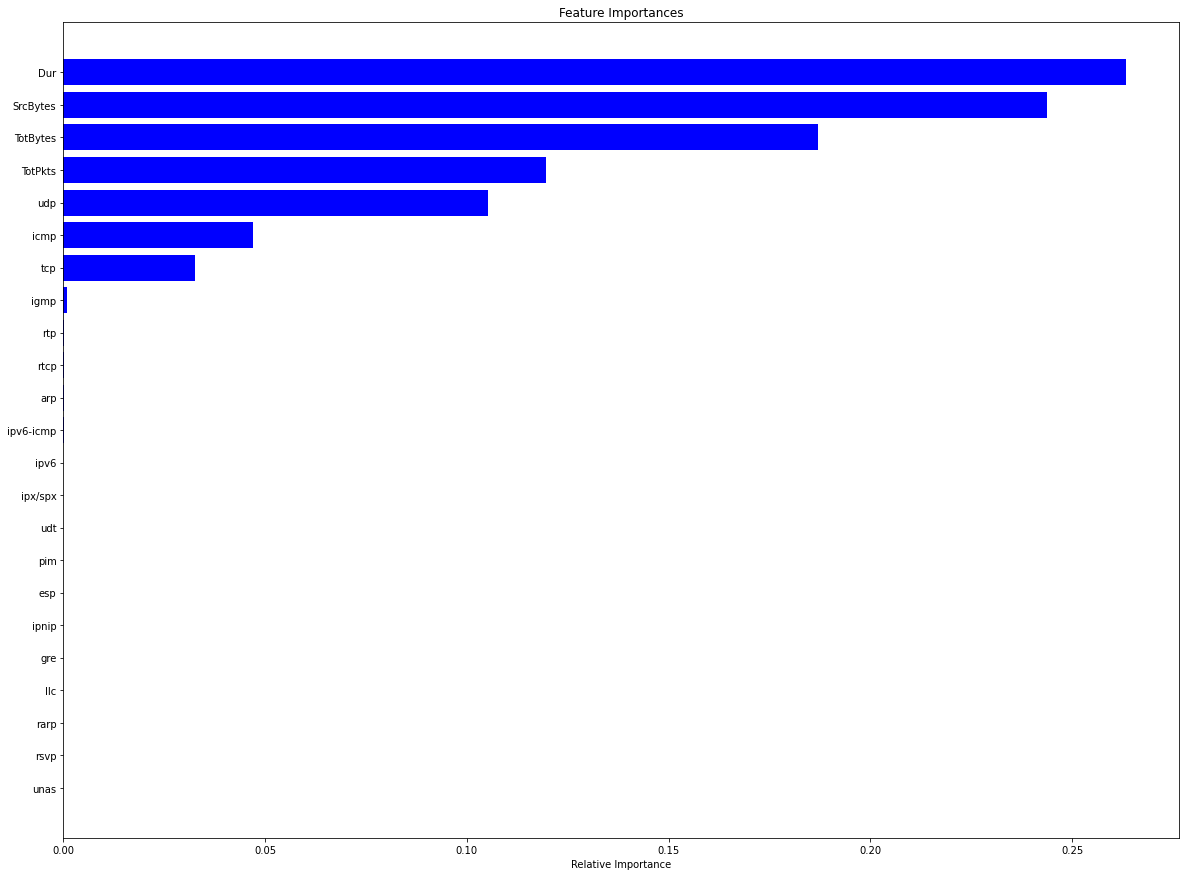

In [44]:
importances = classifier_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()